# Extract images from PDF

In [9]:
!pip install PyMuPDF Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import os
import fitz  # PyMuPDF
import io
from PIL import Image

# Output directory for the extracted images
output_dir = "images"
# Desired output image format
output_format = "png"
# Minimum width and height for extracted images
min_width = 16
min_height = 16
# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [11]:
!wget https://github.com/smmss79/DIP_2023/raw/main/HW3/DIP140102_HW3.pdf

--2023-05-15 11:46:51--  https://github.com/smmss79/DIP_2023/raw/main/HW3/DIP140102_HW3.pdf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW3/DIP140102_HW3.pdf [following]
--2023-05-15 11:46:51--  https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW3/DIP140102_HW3.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75225 (73K) [application/octet-stream]
Saving to: ‘DIP140102_HW3.pdf.1’

DIP140102_HW3.pdf.1 100%[===================>]  73.46K  --.-KB/s    in 0.005s  

2023-05-15 11:46:52 (14.8 MB/s) - ‘DIP140102_HW3.pdf.1’ saved [75225/75225]



In [12]:
# file path you want to extract images from
file = "/content/DIP140102_HW3.pdf"
# open the file
pdf_file = fitz.open(file)


# Iterate over PDF pages
for page_index in range(len(pdf_file)):
    # Get the page itself
    page = pdf_file[page_index]
    # Get image list
    image_list = page.get_images(full=True)
    # Print the number of images found on this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print(f"[!] No images found on page {page_index}")
    # Iterate over the images on the page
    for image_index, img in enumerate(image_list, start=1):
        # Get the XREF of the image
        xref = img[0]
        # Extract the image bytes
        base_image = pdf_file.extract_image(xref)
        image_bytes = base_image["image"]
        # Get the image extension
        image_ext = base_image["ext"]
        # Load it to PIL
        image = Image.open(io.BytesIO(image_bytes))
        # Check if the image meets the minimum dimensions and save it
        if image.width >= min_width and image.height >= min_height:
            image.save(
                open(os.path.join(output_dir, f"image{page_index + 1}_{image_index}.{output_format}"), "wb"),
                format=output_format.upper())
        else:
            print(f"[-] Skipping image {image_index} on page {page_index} due to its small size.")

[+] Found a total of 2 images in page 0


# سوال اول

تصویر زیر را در نظر بگیرید و به آن سه نوع نویز نمک و فلفل، گوسین و نویز ضربه ای اضافه نمائید، برنامه ای بنویسید
که به طور اتوماتیک نوع نویز تصویر را مشخص نماید؟ 

## Visualization

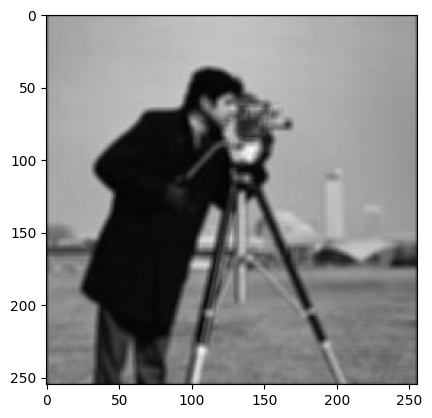

In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


IMAGE1_PATH ="/content/images/image1_1.png"
image1 = cv2.imread(IMAGE1_PATH,0)
plt.imshow(image1,cmap = "gray")
plt.show()

## Add noise to image

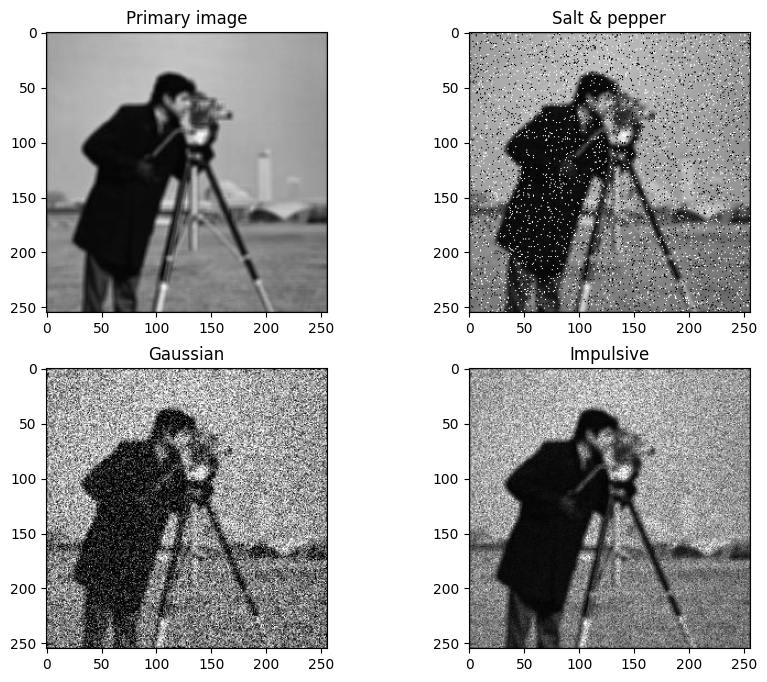

In [14]:
from skimage.util import random_noise

noise_salt_pepper = random_noise(image=image1,
                      mode='s&p',
                      amount=0.1,
                      seed=42)

noise_gaussian = random_noise(image=image1,
                      mode='gaussian',
                      mean=0,
                      var=0.05,
                      seed=42)

noise_impulsive = random_noise(image=image1,
                      mode='speckle',
                      mean=0,
                      var=0.05,
                      seed=42)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Primary image")
plt.imshow(image1,cmap="gray")

plt.subplot(2,2,2)
plt.title("Salt & pepper")
plt.imshow(noise_salt_pepper,cmap="gray")

plt.subplot(2,2,3)
plt.title("Gaussian")
plt.imshow(noise_gaussian,cmap="gray")

plt.subplot(2,2,4)
plt.title("Impulsive")
plt.imshow(noise_impulsive,cmap="gray")

plt.show()

## Noise Detection with histogram (uncomplete)

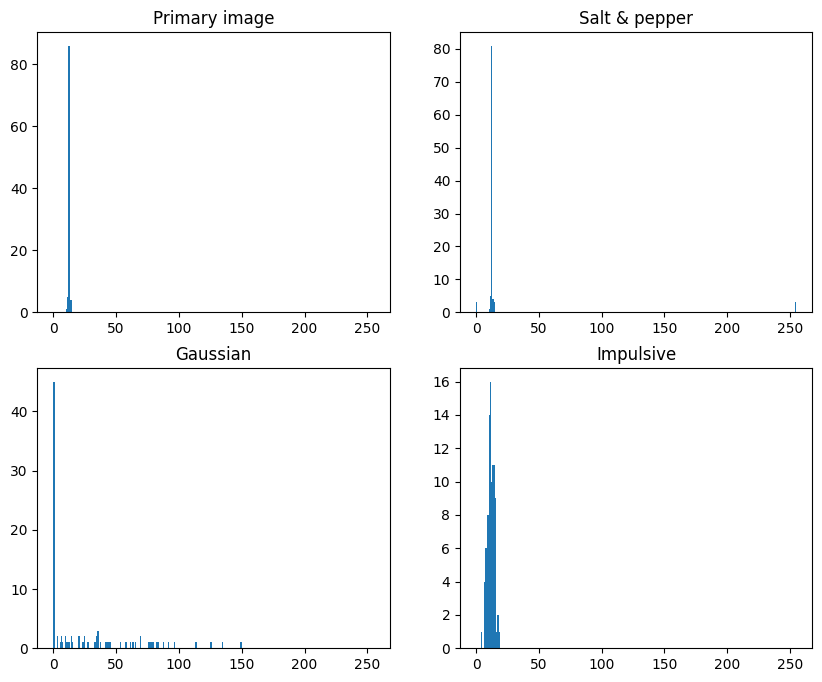

In [15]:
plt.figure(figsize=(10,8))

bins = range(256)

plt.subplot(2,2,1)
plt.title("Primary image")
n1,_,_ = plt.hist(image1[150:160,50:60].ravel(),bins=bins)

plt.subplot(2,2,2)
plt.title("Salt & pepper")
n_sp,_,_ = plt.hist(noise_salt_pepper[150:160,50:60].ravel()*255,bins=bins)


plt.subplot(2,2,3)
plt.title("Gaussian")
n_gs,_,_ = plt.hist(noise_gaussian[150:160,50:60].ravel()*255,bins=bins)

plt.subplot(2,2,4)
plt.title("Impulsive")
n_im,_,_ = plt.hist(noise_impulsive[150:160,50:60].ravel()*255,bins=bins)

plt.show()


In [16]:
sp = n_sp - n1
print(
max( ( sp)[1:-2]),
max(sp),
sp.var()
)

0.0 3.0 0.17254901960784313


(256,)

# سوال دوم

تصویر زیر را یکبار با یک مولفه سینوسی و بار دیگر با دو مولفه سینوسی آغشته به نویز متناوب نمائید. دو تصویر نویزی 
بدست آمده را با فیلتر های میان نگذر و برشی فیلتر نمائید و خروجی این دو فیلتر را مقایسه نمائید. همچنین چند پهنای 
حلقه برای فیلتر میان نگذر و چند پهنای خط برای فیلتر برشی لحاظ کنید و نتایج بدست آمده را تحلیل نمائید؟ 

## visualization 

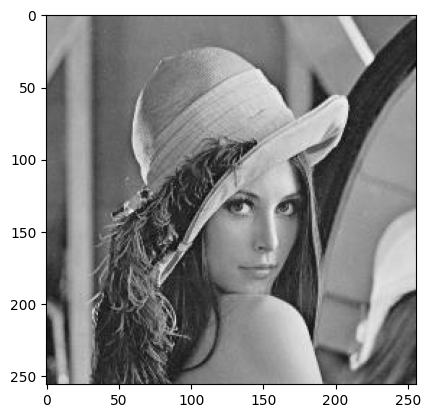

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


IMAGE2_PATH ="/content/images/image1_2.png"
image2 = cv2.imread(IMAGE2_PATH,0)
plt.imshow(image2,cmap = "gray")
plt.show()

## Add sinus noise

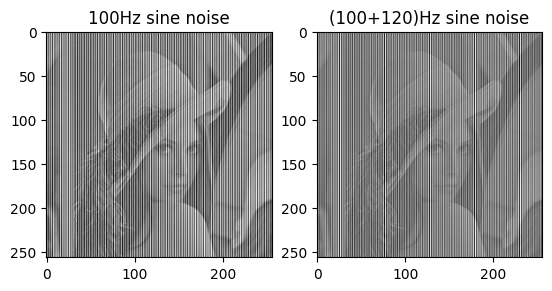

In [54]:
freq = 100
freq2 = 120

t = np.linspace(0,1,256)
noise2 = np.sin(freq*t*2*np.pi)*255
noise3 = np.sin(freq2*t*2*np.pi)*255

image2_noised1 = noise2 + image2
image2_noised2 = noise2 + noise3 + image2

plt.subplot(1,2,1)
plt.imshow(image2_noised1,cmap="gray")
plt.title("100Hz sine noise")
plt.subplot(1,2,2)
plt.imshow(image2_noised2,cmap="gray")
plt.title("(100+120)Hz sine noise")
plt.show()

## Filters

* Design notch filters
* Design bandstop filters
* Apply notch filters
* Apply bandstop filters

In [74]:
import scipy.signal as sp

# Initializations
samp_freq = 256 # Sample frequency (Hz)
notch_freq = 100.0 # Frequency to be removed from signal (Hz)
notch_freq2 = 120.0 # Frequency to be removed from signal (Hz)
quality_factor = 20.0 # Quality factor
butter_order = 6
band_freq = [97,103]
band2_freq = [117,123]


# Design a notch filter using sp.iirnotch
notch1 = sp.iirnotch(notch_freq, quality_factor, samp_freq)
notch2 = sp.iirnotch(notch_freq2, quality_factor, samp_freq)

# Design a butterworth bandstop filter using sp.butter
bandstop = sp.butter(butter_order, band_freq, 'bandstop',fs= samp_freq)
bandstop2 = sp.butter(butter_order, band2_freq, 'bandstop',fs= samp_freq)

# Apply notch filter to the noisy signal using sp.filtfilt
output = sp.filtfilt(notch1[0], notch1[1], image2_noised1)

output2 = sp.filtfilt(notch1[0], notch1[1], image2_noised2)
output2 = sp.filtfilt(notch2[0], notch2[1], output2)

# Apply bandstop filter to the noisy signal using sp.filtfilt
output3 = sp.filtfilt(bandstop[0], bandstop[1], image2_noised1)

output4 = sp.filtfilt(bandstop[0], bandstop[1], image2_noised2)
output4 = sp.filtfilt(bandstop2[0], bandstop2[1], output4)

## Final Results

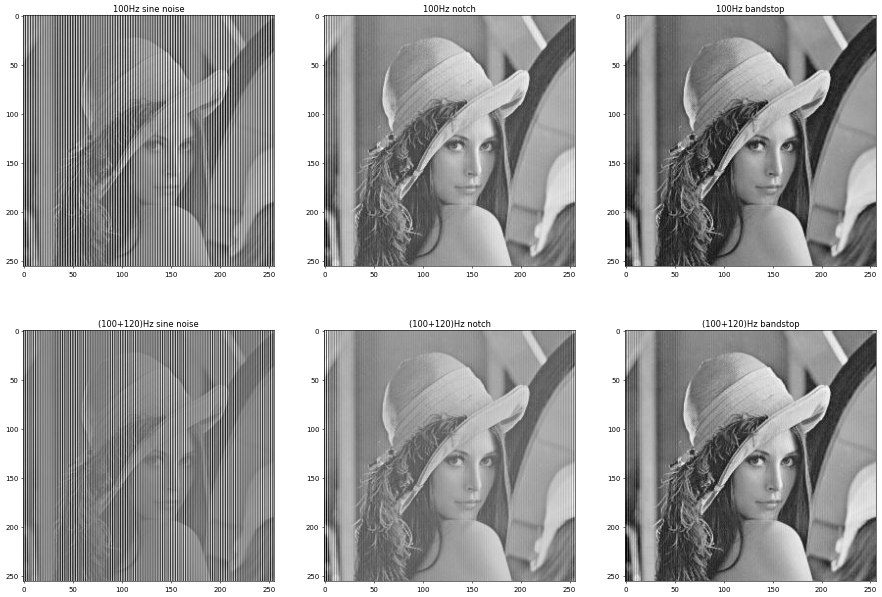

In [77]:

plt.figure(figsize=(22,15),dpi=50)

rows,cols = 2,3

plt.subplot(rows,cols,1)
plt.imshow(image2_noised1,cmap="gray")
plt.title("100Hz sine noise")

plt.subplot(rows,cols,4)
plt.imshow(image2_noised2,cmap="gray")
plt.title("(100+120)Hz sine noise")

plt.subplot(rows,cols,2)
plt.imshow(output,cmap="gray")
plt.title("100Hz notch")

plt.subplot(rows,cols,5)
plt.imshow(output2,cmap="gray")
plt.title("(100+120)Hz notch")

plt.subplot(rows,cols,3)
plt.imshow(output3,cmap="gray")
plt.title("100Hz bandstop")

plt.subplot(rows,cols,6)
plt.imshow(output4,cmap="gray")
plt.title("(100+120)Hz bandstop")

plt.show()

## Applying multiple frequencies
* First, define functions for ease of applying filters
* Second, create a loop for applying different frequencies on the "image with 100Hz noise" and visualizing them for comparison
* Result: As the added noise was 100Hz, 100Hz notch filter and 90-120Hz bandstop filter had best performance.

In [106]:
def notchFilter(image,freq):

  notch = sp.iirnotch(freq, 20, 256)
  output = sp.filtfilt(notch[0], notch[1], image)

  return output

def bandstopFilter(image,band_freq):

  bandstop = sp.butter(6, band_freq, 'bandstop',fs= 256)
  output = sp.filtfilt(bandstop[0], bandstop[1], image)

  return output

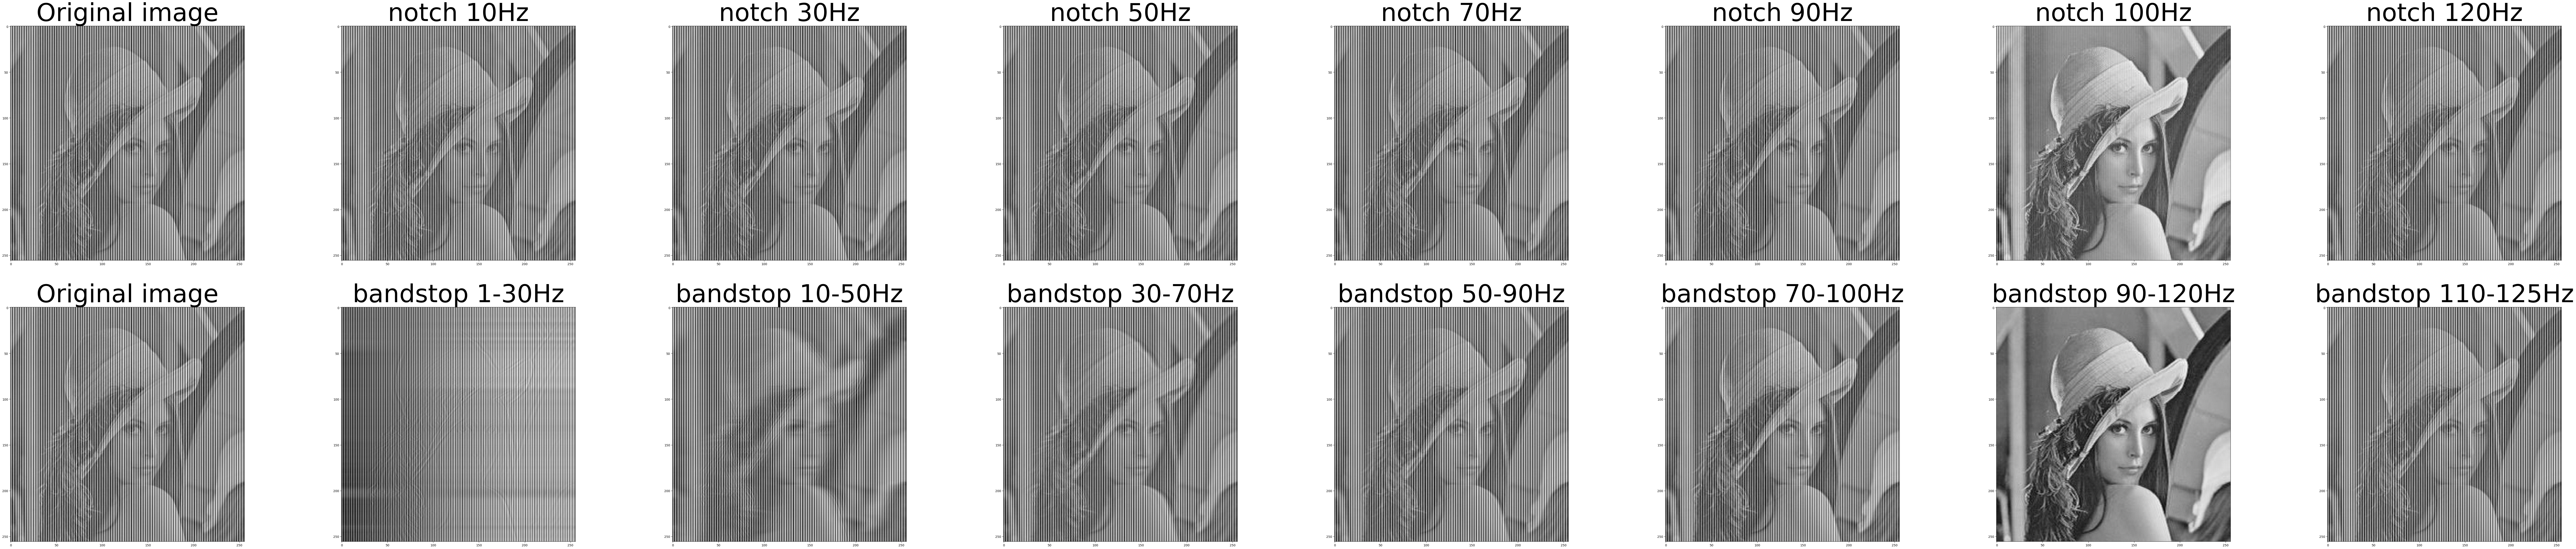

In [113]:
# multi frequency comparsion

plt.figure(figsize=(150,30),dpi=100)

freqs = [10,30,50,70,90,100,120]
freq_bands = [[1,30],[10,50],[30,70],[50,90],[70,100],[90,120],[110,125]]
multi_out = [image2_noised1]
multi_out2 = [image2_noised1]

rows2, cols2 = 2,8

plt.subplot(rows2,cols2,1)
plt.imshow(multi_out[0],cmap="gray")
plt.title("Original image",fontsize = 80)

plt.subplot(rows2,cols2,9)
plt.imshow(multi_out2[0],cmap="gray")
plt.title("Original image",fontsize = 80)



for i in range(len(freqs)):

  plt.subplot(rows2,cols2,i+2)
  multi_out.append(notchFilter(image2_noised1,freqs[i]))
  plt.imshow(multi_out[-1],cmap="gray")
  plt.title(f"notch {freqs[i]}Hz",fontsize = 80)

  plt.subplot(rows2,cols2,i+cols2+2)
  multi_out2.append(bandstopFilter(image2_noised1,freq_bands[i]))
  plt.imshow(multi_out2[-1],cmap="gray")
  plt.title(f"bandstop {freq_bands[i][0]}-{freq_bands[i][1]}Hz",fontsize = 80)

plt.savefig(fname="final")
plt.show()
